In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import scipy.stats as stats
import scipy.optimize as opt

# NSL_2

The second notebook of the NSL consists of two exercises. In the first one, an intergral is calculated making use of Monte Carlo methods. In the second one a 3D random walk is simulated and analysed.

### EX 02_1

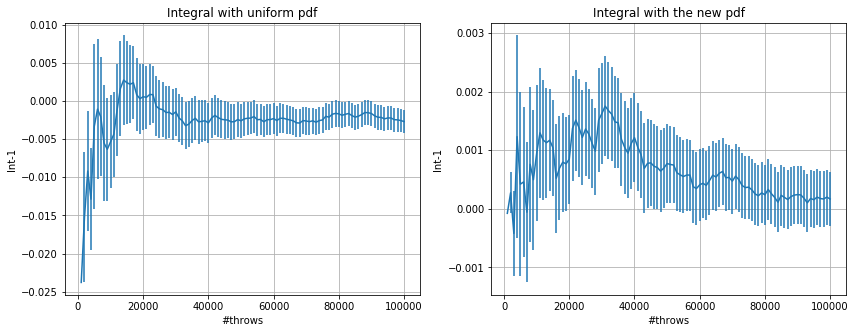

In [4]:
x, I1, Ie1, I2, Ie2 = np.loadtxt("results/es02_1.txt", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')
I = [I1, I2]
I_err = [Ie1, Ie2]
title = ['Integral with uniform pdf','Integral with the new pdf']

fig, axx = plt.subplots(1, 2,figsize=(14, 5))
axx = axx.reshape(-1)

for k in range(2):
    ax = axx[k]
    ax.errorbar(x, I[k],I_err[k])
    ax.set_title(title[k])
    ax.set_xlabel(f"#throws")
    ax.set_ylabel(f"Int-1")
    #ax.xaxis.label.set_size(14)
    #ax.yaxis.label.set_size(14)
    ax.grid(True)

The integral requested
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx$$
has been calculated with a uniform distribution (first graph) and with the importance sampling method (second graph). Both the calculation have been carried out with the blocking method described in NSL_1 with a total number of throws $M=10^5$ and $N=100$ blocks.

1. The first method is the one described in NSL_1. The interval is sampled with a uniform distribution and $L = M/N$ values of it are calculated using the mean value of the function in the interval.
2. The importance sampling consists in integrating the function divided by a simple non-uniform pdf that resembles the function in the interval. Moreover, the interval is sampled with this new function. In this case the normalized first order Taylor expansion of the function in $x=1$ has been chosen as pdf: $$ p(x) = 2(1-x) $$ The cdf of $p(x)$ is invertible in $(0,1)$ hence this interval can be easily sampled with $p(x)$

As it can be seen from the graph, both the computations are compatible with the analytical value of the integral but the importance sampling has an uncertainty of $5\sim 10$ times lower then the one of the uniform sampling.

### EX 02_2

Best a for the Discrete RW is [1.01066638]
Best a for the Continuous RW is [1.01344821]


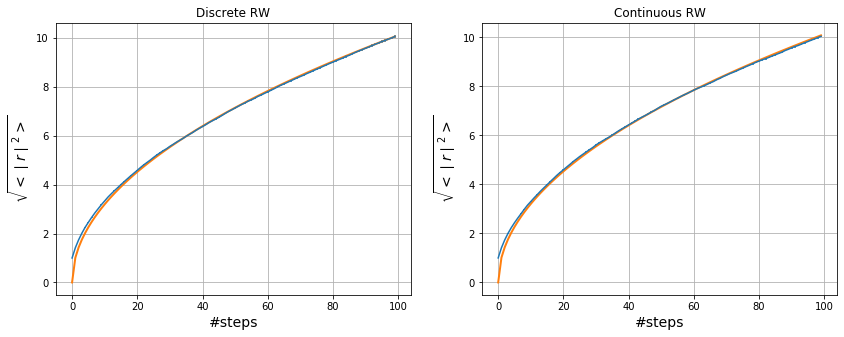

In [5]:
x, discr, discr_err, cont, cont_err = np.loadtxt("results/es02_2.txt", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')
r = [discr, cont]
r_err = [discr_err, cont_err]
title = ['Discrete RW','Continuous RW']
y = np.linspace(0,100,100)

def f( x, a ):
    return a*np.sqrt(x);    

fig, axx = plt.subplots(1, 2,figsize=(14, 5))
axx = axx.reshape(-1)

for k in range(2):
    ax = axx[k]
    ax.errorbar(x, r[k],r_err[k])
    ax.set_title(title[k])
    ax.set_xlabel(r"#steps")
    ax.set_ylabel(r"$\sqrt{<{\mid r\mid}^2>}$")
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.grid(True)
    c = opt.curve_fit(f, x, r[k])[0]
    ax.plot(x, c*np.sqrt(x), linewidth = 2)
    print(f"Best a for the {title[k]} is {c}")

The two graphs above represent $\sqrt{\langle {\mid r \mid}^2 \rangle}$ and its tiny statistical error in function of the number of steps for two 3D random walks: a discrete RW and a continuous RW. The value of $\sqrt{\langle {\mid r \mid}^2 \rangle}$ at each point is calculated simulating $M = 10^4$ random walks and appling the blocking method with $N=100$ blocks.

The diffusive behaviour is represented by their characteristic trend. The two values above the graphs express the parameter $a$ of the test function $a\sqrt{n}$ fitted with the two simulations. For a high number of steps, an ideal random walk with unitary steps has $\sqrt{\langle {\mid r \mid}^2 \rangle} \sim \sqrt{n}$. The two parameters calculated by fitting the simulations with the test function are cleary near one. Hence the simulated random walks have a diffusive behaviour.